In [27]:

def getData(filename):
    f = open(filename,'r')
    datas = f.readlines()
    label = datas[0].split(',')
    del (label[6])
    # label[len(label)-1] = label[len(label)-1].replace('\n','')
    data_set = []
    for i in range(1,len(datas)):
        temp = datas[i].split(',')
        temp[len(temp) - 1] = temp[len(temp) - 1].replace('\n', '')
        data_set.append(temp)
    return label,data_set

label_set,data_set = getData('Experiment1/data/car_data.csv')

print(label_set)
#加载训练数据 80% 测试数据 20%
train_list = data_set[0:1382]  # 训练集 数据
test_list = data_set[1383:]  # 测试集 数据
print('训练集大小',len(train_list))
print('测试集大小',len(test_list))

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
训练集大小 1382
测试集大小 345


In [29]:
#打开文件取出决策树
def loadTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)
def classify(tree2, label, testVec):  # label为特征的标签值；testVec为测试数据，即所有特征的具体值构成的向量
    firstFeat = ''  # 取出tree的第一个键
    for i in tree2.keys():
        firstFeat = i
        break
    
    secondDict = tree2[firstFeat]  # 取出tree第一个键的值，即tree的第二个字典（包含关系）
    labelIndex = label.index(firstFeat)  # 得到第一个特征firstFeat在标签label中的索引
    classLabel = ''
    for key in secondDict.keys():  # 遍历第二个字典的键
        if testVec[labelIndex] == key:  # 如果第一个特征的测试值与第二个字典的键相等时
            if type(secondDict[key]).__name__ == 'dict':  # 如果第二个字典的值还是一个字典，说明分类还没结束，递归执行classify函数
                classLabel = classify(secondDict[key], label, testVec)  # 递归函数中只有输入的第一个参数不同，不断向字典内层渗入
            else:
                classLabel = secondDict[key]  # 最后将得到的分类值赋给classLabel输出
    return classLabel

tree = loadTree('Experiment1/data/dataTree_4.txt')
pos_count = 0#正确分类数量
neg_count = 0 #错误分类数量
classify_result_list = [] #存储分类结果
for test in test_list:
    classify_result = classify(tree,label_set,test)
    classify_result_list.append(classify_result)
    
for i in range(0,len(classify_result_list)):
    if classify_result_list[i] == test_list[i][6]:
        pos_count +=1
    else:
        neg_count +=1
print('测试集总数',len(test_list))
print('正确分类数',pos_count)
print('错误分类数',neg_count)
print('分类的准确率为',pos_count/len(test_list))

测试集总数 345
正确分类数 329
错误分类数 16
分类的准确率为 0.9536231884057971


对于结果为unacc  即数据集中classify 为0的   构建混淆矩阵 计算准确率 精度 召回率 F 度量
准确率———— 0.7439293598233996
精度(查准率) ———— 0.6795252225519288
召回率(查全率)———— 0.7439293598233996
f1值 ———— 0.7979094076655052


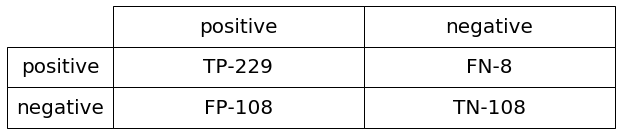

In [30]:
#对于结果为unacc  classify 为0  构建混淆矩阵 计算准确率 精度 召回率 F 度量
print('对于结果为unacc  即数据集中classify 为0的   构建混淆矩阵 计算准确率 精度 召回率 F 度量')
tp, fp, fn, tn = 0, 0, 0, 0
#tp 为预测结果为0 且真实为0的数据   将一个正例正确判断为正例
#fp 为预测结果为0 且真实为1，2，3的数据    将一个反例错误判断为正例
#fn 为预测结果为1，2，3 且真实为0的数据     将一个正例错误判断为反例
#tn 为预测结果为1，2，3 且真实为1，2，3的数据   将一个反例正确判断为反例
for i in range(0,len(classify_result_list)):
    if test_list[i][6] == 'unacc' and  classify_result_list[i] == 'unacc':
        tp += 1
    if test_list[i][6] == 'unacc' and  classify_result_list[i] != 'unacc':
        fn += 1
    if test_list[i][6] != 'unacc' and  classify_result_list[i] != 'unacc':
        fp += 1
    if test_list[i][6] != 'unacc' and  classify_result_list[i] != 'unacc':
        tn += 1
            
            
#混淆矩阵
from matplotlib import pyplot as plt
col_labels = ['positive','negative']

row_labels = ['positive','negative']
R, C = len(row_labels), len(col_labels)
figC, figR = 2.25*C, R
fig = plt.figure(figsize=(figC, figR))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

table_vals = [['TP-'+str(tp),'FN-'+str(fn)],['FP-'+str(fp),'TN-'+str(tn)]]
my_table = plt.table(cellText=table_vals, rowLabels=row_labels, 
                     colLabels=col_labels, 
                     rowLoc='center', loc='center',cellLoc='center')
my_table.set_fontsize(20)
    
    # 伸缩表格大小常数
my_table.scale(figR/R*2 ,figC/C*1.5)
#准确率   分类正确的样本数占样本总数的比例
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('准确率————',accuracy)

#精度   预测为正例的样本中真正为正例的比例：
precision = (tp) / (tp+fp)
print('精度(查准率) ————',precision)
#召回率  真正为正例的样本中正确预测为正例的比例：
recall = (tp) / (tp+fn)
print('召回率(查全率)————',accuracy)
#f值 
f1 = (2*precision*recall) / (precision+recall)
print('f1值 ————',f1)


            
            
       


对于结果为acc  即数据集中classify 为1的   构建混淆矩阵 计算准确率 精度 召回率 F 度量
准确率———— 0.7439293598233996
精度(查准率) ———— 0.6795252225519288
召回率(查全率)———— 0.7439293598233996
f1值 ———— 0.7979094076655052


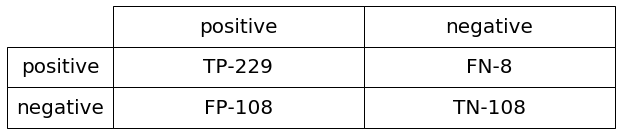

In [31]:
#对于结果为acc  classify 为1  构建混淆矩阵 计算准确率 精度 召回率 F 度量
print('对于结果为acc  即数据集中classify 为1的   构建混淆矩阵 计算准确率 精度 召回率 F 度量')
tp, fp, fn, tn = 0, 0, 0, 0
#tp 为预测结果为1 且真实为1的数据   将一个正例正确判断为正例
#fp 为预测结果为1 且真实为0，2，3的数据    将一个反例错误判断为正例
#fn 为预测结果为0，2，3 且真实为1的数据     将一个正例错误判断为反例
#tn 为预测结果为0，2，3 且真实为0，2，3的数据   将一个反例正确判断为反例
for i in range(0,len(classify_result_list)):
    if test_list[i][6] == 'unacc' and  classify_result_list[i] == 'unacc':
        tp += 1
    if test_list[i][6] == 'unacc' and  classify_result_list[i] != 'unacc':
        fn += 1
    if test_list[i][6] != 'unacc' and  classify_result_list[i] != 'unacc':
        fp += 1
    if test_list[i][6] != 'unacc' and  classify_result_list[i] != 'unacc':
        tn += 1
            
            
#混淆矩阵
from matplotlib import pyplot as plt
col_labels = ['positive','negative']

row_labels = ['positive','negative']
R, C = len(row_labels), len(col_labels)
figC, figR = 2.25*C, R
fig = plt.figure(figsize=(figC, figR))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

table_vals = [['TP-'+str(tp),'FN-'+str(fn)],['FP-'+str(fp),'TN-'+str(tn)]]
my_table = plt.table(cellText=table_vals, rowLabels=row_labels, 
                     colLabels=col_labels, 
                     rowLoc='center', loc='center',cellLoc='center')
my_table.set_fontsize(20)
    
    # 伸缩表格大小常数
my_table.scale(figR/R*2 ,figC/C*1.5)
#准确率   分类正确的样本数占样本总数的比例
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('准确率————',accuracy)

#精度   预测为正例的样本中真正为正例的比例：
precision = (tp) / (tp+fp)
print('精度(查准率) ————',precision)
#召回率  真正为正例的样本中正确预测为正例的比例：
recall = (tp) / (tp+fn)
print('召回率(查全率)————',accuracy)
#f值 
f1 = (2*precision*recall) / (precision+recall)
print('f1值 ————',f1)

对于结果为good  即数据集中classify 为2的   构建混淆矩阵 计算准确率 精度 召回率 F 度量
准确率———— 0.5052005943536404
精度(查准率) ———— 0.029411764705882353
召回率(查全率)———— 0.5052005943536404
f1值 ———— 0.05665722379603399


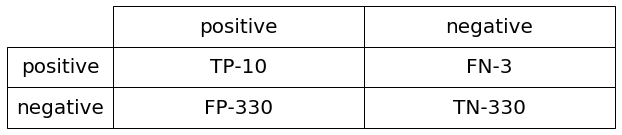

In [32]:
#对于结果为good  classify 为2  构建混淆矩阵 计算准确率 精度 召回率 F 度量
print('对于结果为good  即数据集中classify 为2的   构建混淆矩阵 计算准确率 精度 召回率 F 度量')
tp, fp, fn, tn = 0, 0, 0, 0
#tp 为预测结果为2 且真实为2的数据   将一个正例正确判断为正例
#fp 为预测结果为2 且真实为0，1，3的数据    将一个反例错误判断为正例
#fn 为预测结果为0，1，3 且真实为2的数据     将一个正例错误判断为反例
#tn 为预测结果为0，1，3 且真实为0，1，3的数据   将一个反例正确判断为反例
for i in range(0,len(classify_result_list)):
    if test_list[i][6] == 'good' and  classify_result_list[i] == 'good':
        tp += 1
    if test_list[i][6] == 'good' and  classify_result_list[i] != 'good':
        fn += 1
    if test_list[i][6] != 'good' and  classify_result_list[i] != 'good':
        fp += 1
    if test_list[i][6] != 'good' and  classify_result_list[i] != 'good':
        tn += 1
            
            
#混淆矩阵
from matplotlib import pyplot as plt
col_labels = ['positive','negative']

row_labels = ['positive','negative']
R, C = len(row_labels), len(col_labels)
figC, figR = 2.25*C, R
fig = plt.figure(figsize=(figC, figR))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

table_vals = [['TP-'+str(tp),'FN-'+str(fn)],['FP-'+str(fp),'TN-'+str(tn)]]
my_table = plt.table(cellText=table_vals, rowLabels=row_labels, 
                     colLabels=col_labels, 
                     rowLoc='center', loc='center',cellLoc='center')
my_table.set_fontsize(20)
    
    # 伸缩表格大小常数
my_table.scale(figR/R*2 ,figC/C*1.5)
#准确率   分类正确的样本数占样本总数的比例
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('准确率————',accuracy)

#精度   预测为正例的样本中真正为正例的比例：
precision = (tp) / (tp+fp)
print('精度(查准率) ————',precision)
#召回率  真正为正例的样本中正确预测为正例的比例：
recall = (tp) / (tp+fn)
print('召回率(查全率)————',accuracy)
#f值 
if 2*precision*recall == 0:
    print('f1值 ————',0.0)
else:
    f1 = (2*precision*recall) / (precision+recall)
    print('f1值 ————',f1)

对于结果为vgood  即数据集中classify 为3的   构建混淆矩阵 计算准确率 精度 召回率 F 度量
准确率———— 0.508955223880597
精度(查准率) ———— 0.04105571847507331
召回率(查全率)———— 0.508955223880597
f1值 ———— 0.0784313725490196


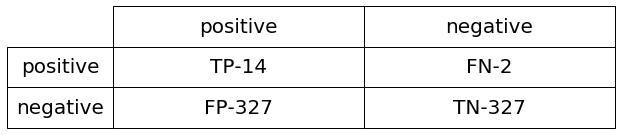

In [33]:
#对于结果为vgood  classify 为3  构建混淆矩阵 计算准确率 精度 召回率 F 度量
print('对于结果为vgood  即数据集中classify 为3的   构建混淆矩阵 计算准确率 精度 召回率 F 度量')
tp, fp, fn, tn = 0, 0, 0, 0
#tp 为预测结果为2 且真实为2的数据   将一个正例正确判断为正例
#fp 为预测结果为2 且真实为0，1，3的数据    将一个反例错误判断为正例
#fn 为预测结果为0，1，3 且真实为2的数据     将一个正例错误判断为反例
#tn 为预测结果为0，1，3 且真实为0，1，3的数据   将一个反例正确判断为反例
for i in range(0,len(classify_result_list)):
    if test_list[i][6] == 'vgood' and  classify_result_list[i] == 'vgood':
        tp += 1
    if test_list[i][6] == 'vgood' and  classify_result_list[i] != 'vgood':
        fn += 1
    if test_list[i][6] != 'vgood' and  classify_result_list[i] != 'vgood':
        fp += 1
    if test_list[i][6] != 'vgood' and  classify_result_list[i] != 'vgood':
        tn += 1
            
            
#混淆矩阵
from matplotlib import pyplot as plt
col_labels = ['positive','negative']

row_labels = ['positive','negative']
R, C = len(row_labels), len(col_labels)
figC, figR = 2.25*C, R
fig = plt.figure(figsize=(figC, figR))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

table_vals = [['TP-'+str(tp),'FN-'+str(fn)],['FP-'+str(fp),'TN-'+str(tn)]]
my_table = plt.table(cellText=table_vals, rowLabels=row_labels, 
                     colLabels=col_labels, 
                     rowLoc='center', loc='center',cellLoc='center')
my_table.set_fontsize(20)
    
    # 伸缩表格大小常数
my_table.scale(figR/R*2 ,figC/C*1.5)
#准确率   分类正确的样本数占样本总数的比例
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('准确率————',accuracy)

#精度   预测为正例的样本中真正为正例的比例：
precision = (tp) / (tp+fp)
print('精度(查准率) ————',precision)
#召回率  真正为正例的样本中正确预测为正例的比例：
recall = (tp) / (tp+fn)
print('召回率(查全率)————',accuracy)
#f值
if 2*precision*recall == 0:
    print('f1值 ————',0.0)
else:
    f1 = (2*precision*recall) / (precision+recall)
    print('f1值 ————',f1)

In [34]:
temp_test_list = test_list[0:21]#取20个测试集

#使用决策树执行分类，返回分类结果
def classify(tree, label, testVec):  # label为特征的标签值；testVec为测试数据，即所有特征的具体值构成的向量
    firstFeat = ''  # 取出tree的第一个键
    for i in tree.keys():
        firstFeat = i
        break
    secondDict = tree[firstFeat]  # 取出tree第一个键的值，即tree的第二个字典（包含关系）
    labelIndex = label.index(firstFeat)  # 得到第一个特征firstFeat在标签label中的索引
    classLabel = ''
    print(firstFeat,'=>', testVec[labelIndex])
    for key in secondDict.keys():  # 遍历第二个字典的键
        if testVec[labelIndex] == key:  # 如果第一个特征的测试值与第二个字典的键相等时
            if type(secondDict[key]).__name__ == 'dict':  # 如果第二个字典的值还是一个字典，说明分类还没结束，递归执行classify函数
                classLabel = classify(secondDict[key], label, testVec)  # 递归函数中只有输入的第一个参数不同，不断向字典内层渗入
            else:
                classLabel = secondDict[key]  # 最后将得到的分类值赋给classLabel输出
    
    return classLabel
tree = loadTree('Experiment1/data/dataTree_3.txt')
pos_count = 0#正确分类数量
neg_count = 0 #错误分类数量
classify_result_list = [] #存储分类结果

for test in temp_test_list:
    print('数据标签为',label_set)
    print('测试数据为',test )
    classify_result = classify(tree,label_set,test)
    print('分类为','=>',classify_result)
    print()
    print()
    
    # classify_result_list.append(classify_result)
    

数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['high', 'high', '2', '4', 'med', 'med', 'unacc']
safety => med
persons => 4
buying => high
lug_boot => med
doors => 2
分类为 => unacc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['high', 'vhigh', '2', '2', 'small', 'low', 'unacc']
safety => low
分类为 => unacc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['vhigh', 'low', '5more', '4', 'big', 'med', 'acc']
safety => med
persons => 4
buying => vhigh
maint => low
lug_boot => big
分类为 => acc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['high', 'vhigh', '3', '4', 'big', 'low', 'unacc']
safety => low
分类为 => unacc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['med', 'vhigh', '4', '2', 'med', 'med', 'unacc']
safety => med
persons => 2
分类为 => unacc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['vhigh', 'vhigh', '4', '4', 's




数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['high', 'med', '5more', '4', 'med', 'high', 'acc']
safety => high
persons => 4
buying => high
maint => med
分类为 => acc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['low', 'high', '4', '2', 'small', 'med', 'unacc']
safety => med
persons => 2
分类为 => unacc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['med', 'med', '4', '4', 'small', 'low', 'unacc']
safety => low
分类为 => unacc


数据标签为 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
测试数据为 ['vhigh', 'vhigh', '3', '2', 'small', 'low', 'unacc']
safety => low
分类为 => unacc


